In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors

# Exploratory Data Analysis (EDA)

### Read DataSet

In [4]:
movies = pd.read_csv(r'movies_.csv')
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


### Info

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### Informations about numerical columns

In [5]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


### Data Types

In [6]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### NULL Values

In [7]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### Handle NULL Values

Drop null values if count is small.

In [8]:
movies.shape

(7668, 15)

In [9]:
#movies.dropna(axis=0, subset=['rating','released','score','votes','writer','star','country','company','runtime'],inplace=True)
movies = movies.dropna(axis=0,  subset=['budget'])
movies.shape

(5497, 15)

In [10]:
movies.isnull().sum()

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
gross       61
company      6
runtime      2
dtype: int64

In [11]:
movies = movies.dropna(axis=0,  subset=['gross'])
movies.shape

(5436, 15)

In [12]:
movies.isnull().sum()

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

In [13]:
movies['rating'].value_counts()

R            2597
PG-13        1730
PG            909
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64

In [14]:
movies['rating'] = movies['rating'].fillna('R')

In [15]:
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     1
budget      0
gross       0
company     2
runtime     1
dtype: int64

In [16]:
movies = movies.dropna(axis=0, subset=['country','company','runtime'])
movies.shape

(5432, 15)

In [17]:
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [18]:
movies.reset_index(inplace = True, drop = True)

In [19]:
movies.shape

(5432, 15)

After drop null values, dataset:

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5432 non-null   object 
 1   rating    5432 non-null   object 
 2   genre     5432 non-null   object 
 3   year      5432 non-null   int64  
 4   released  5432 non-null   object 
 5   score     5432 non-null   float64
 6   votes     5432 non-null   float64
 7   director  5432 non-null   object 
 8   writer    5432 non-null   object 
 9   star      5432 non-null   object 
 10  country   5432 non-null   object 
 11  budget    5432 non-null   float64
 12  gross     5432 non-null   float64
 13  company   5432 non-null   object 
 14  runtime   5432 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 636.7+ KB


In [21]:
movies = movies.drop('name', axis=1)

In [22]:
movies['writer'].nunique()

3212

In [23]:
movies['director'].nunique()

2066

In [24]:
movies['star'].nunique()

1851

In [25]:
movies['released'].nunique()

2566

In [26]:
movies['company'].nunique()

1480

In [5]:
movies['country'].nunique()

59

Remove the ones with lots of unique vals

In [27]:
movies = movies.drop(['writer','director','star','released','company'], axis=1)

In [28]:
movies.head()

,rating,genre,year,score,votes,country,budget,gross,runtime
0,R,Drama,1980,8.4,927000.0,United Kingdom,19000000.0,46998772.0,146.0
1,R,Adventure,1980,5.8,65000.0,United States,4500000.0,58853106.0,104.0
2,PG,Action,1980,8.7,1200000.0,United States,18000000.0,538375067.0,124.0
3,PG,Comedy,1980,7.7,221000.0,United States,3500000.0,83453539.0,88.0
4,R,Comedy,1980,7.3,108000.0,United States,6000000.0,39846344.0,98.0


#### Oznitelik - Score iliskisi

Rating

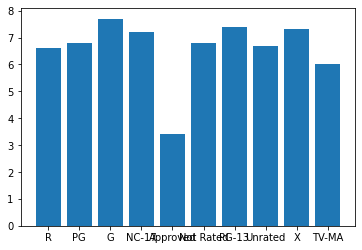

In [29]:
ratings = [[]]
rating_arr = []
scores  = []
scores_arr = np.zeros(movies['rating'].nunique())
leng = len(movies['rating'])
for i in range(0,leng):
    if(np.isin(rating_arr,movies['rating'][i]).any()):
        index = 0
        for j in range(0,len(rating_arr)):
            if(rating_arr[j] == movies['rating'][i]):
                index = j
    else: 
        rating_arr.append(movies['rating'][i])
        ratings.append(movies['rating'][i])
        index = len(rating_arr)-1
            
    scores_arr[index] = movies['score'][i]

for i in range(0,len(rating_arr)):
    scores.append(np.mean(scores_arr[i]))

xpoints = np.array(rating_arr)
ypoints = np.array(scores)

plt.bar(xpoints,ypoints)
plt.show()

Genre

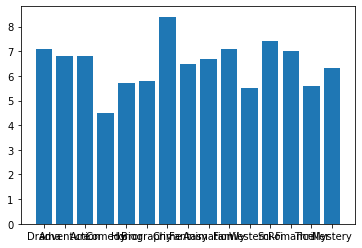

In [30]:
ratings = [[]]
rating_arr = []
scores  = []
scores_arr = np.zeros(movies['genre'].nunique())
leng = len(movies['genre'])
for i in range(0,leng):
    if(np.isin(rating_arr,movies['genre'][i]).any()):
        index = 0
        for j in range(0,len(rating_arr)):
            if(rating_arr[j] == movies['genre'][i]):
                index = j
    else: 
        rating_arr.append(movies['genre'][i])
        ratings.append(movies['genre'][i])
        index = len(rating_arr)-1
            
    scores_arr[index] = movies['score'][i]

for i in range(0,len(rating_arr)):
    scores.append(np.mean(scores_arr[i]))

xpoints = np.array(rating_arr)
ypoints = np.array(scores)

plt.bar(xpoints,ypoints)
plt.show()

Country

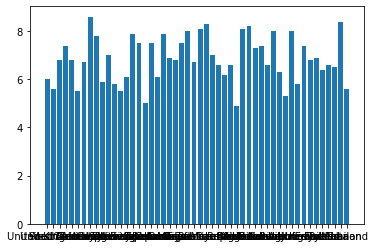

In [31]:
ratings = [[]]
rating_arr = []
scores  = []
scores_arr = np.zeros(movies['country'].nunique())
leng = len(movies['country'])
for i in range(0,leng):
    if(np.isin(rating_arr,movies['country'][i]).any()):
        index = 0
        for j in range(0,len(rating_arr)):
            if(rating_arr[j] == movies['country'][i]):
                index = j
    else: 
        rating_arr.append(movies['country'][i])
        ratings.append(movies['country'][i])
        index = len(rating_arr)-1
            
    scores_arr[index] = movies['score'][i]

for i in range(0,len(rating_arr)):
    scores.append(np.mean(scores_arr[i]))

xpoints = np.array(rating_arr)
ypoints = np.array(scores)

plt.bar(xpoints,ypoints)
plt.show()

Contry, Rating ve Genre sonuca etkisi olmadigindan droplanacaktir

In [32]:
movies = movies.drop(['country','rating','genre'], axis=1)

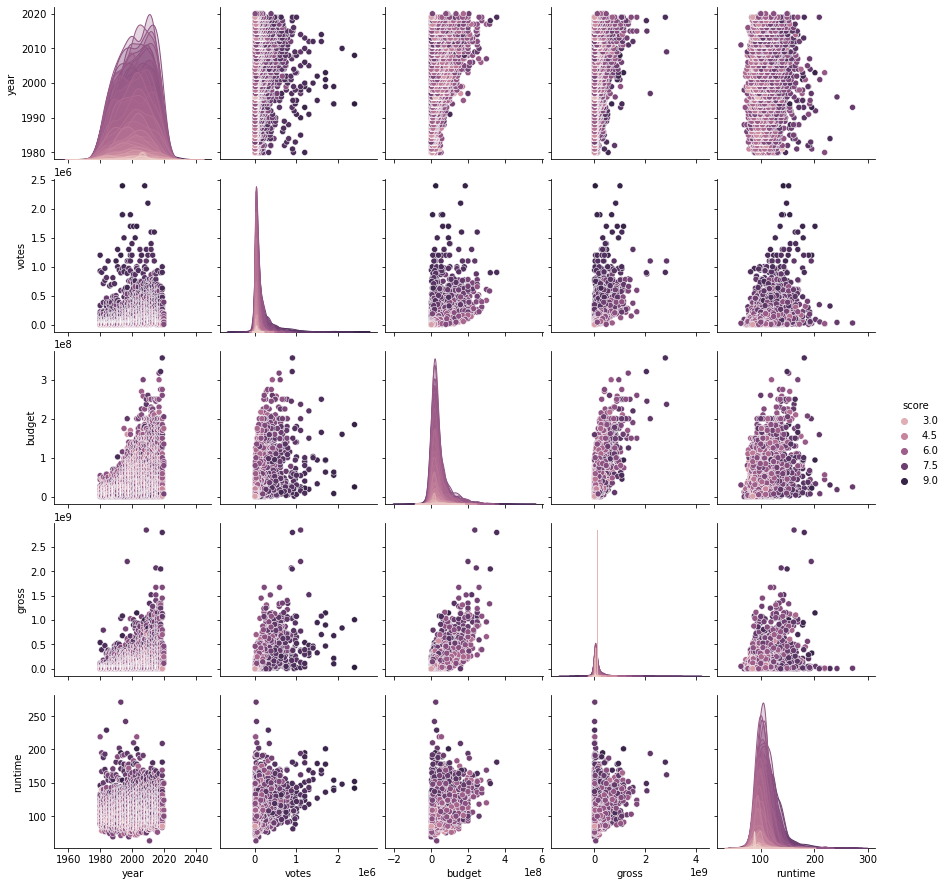

In [33]:
sns.pairplot(movies, hue="score")
plt.show()

### Balance check

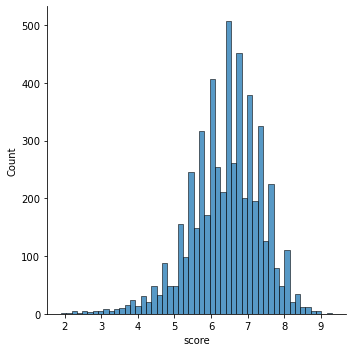

In [34]:
sns.displot(movies["score"])
plt.show()

Data set is  not balanced

In [35]:
dokuz_on = movies[movies['score'] > 9]
dokuz_on = dokuz_on[dokuz_on['score'] <=10 ]

sekiz_dokuz = movies[movies['score'] > 8]
sekiz_dokuz = sekiz_dokuz[sekiz_dokuz['score'] <=9 ]

yedi_sekiz = movies[movies['score'] > 7]
yedi_sekiz = yedi_sekiz[yedi_sekiz['score'] <=8 ]

alti_yedi = movies[movies['score'] > 6]
alti_yedi = alti_yedi[alti_yedi['score'] <=7 ]

bes_alti = movies[movies['score'] > 5]
bes_alti = bes_alti[bes_alti['score'] <=6 ]

dort_bes = movies[movies['score'] > 4]
dort_bes = dort_bes[dort_bes['score'] <=5 ]

uc_dort = movies[movies['score'] > 3]
uc_dort = uc_dort[uc_dort['score'] <=4 ]

iki_uc = movies[movies['score'] > 2]
iki_uc = iki_uc[iki_uc['score'] <=3 ]

bir_iki = movies[movies['score'] > 1]
bir_iki = bir_iki[bir_iki['score'] <=2 ]

6-7 araliginda olmayanlara oversample islemi uygulanarak data balance hale getirilicektir

In [36]:
dokuz_on_count = len(dokuz_on)
sekiz_dokuz_count = len(sekiz_dokuz)
yedi_sekiz_count = len(yedi_sekiz)
alti_yedi_count = len(alti_yedi)
bes_alti_count = len(bes_alti)
dort_bes_count = len(dort_bes)
uc_dort_count = len(uc_dort)
iki_uc_count = len(iki_uc)
bir_iki_count = len(bir_iki)

dokuz_on_over = resample(dokuz_on,replace=True,n_samples=500)
sekiz_dokuz_over = resample(sekiz_dokuz,replace=True,n_samples=yedi_sekiz_count)
yedi_sekiz_over = resample(yedi_sekiz,replace=True,n_samples=yedi_sekiz_count)
alti_yedi_under = resample(alti_yedi,replace=True,n_samples=yedi_sekiz_count)
bes_alti_over = resample(bes_alti,replace=True,n_samples=yedi_sekiz_count)
dort_bes_over = resample(dort_bes,replace=True,n_samples=yedi_sekiz_count)
uc_dort_over = resample(uc_dort,replace=True,n_samples=yedi_sekiz_count)
iki_uc_over = resample(iki_uc,replace=True,n_samples=yedi_sekiz_count)
bir_iki_over = resample(bir_iki,replace=True,n_samples=500)

In [37]:
movies_oversampled = pd.concat([dokuz_on_over,sekiz_dokuz_over,yedi_sekiz_over,alti_yedi_under,bes_alti_over,dort_bes_over,uc_dort_over,iki_uc_over,bir_iki_over]).reset_index(drop=True)

In [38]:
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


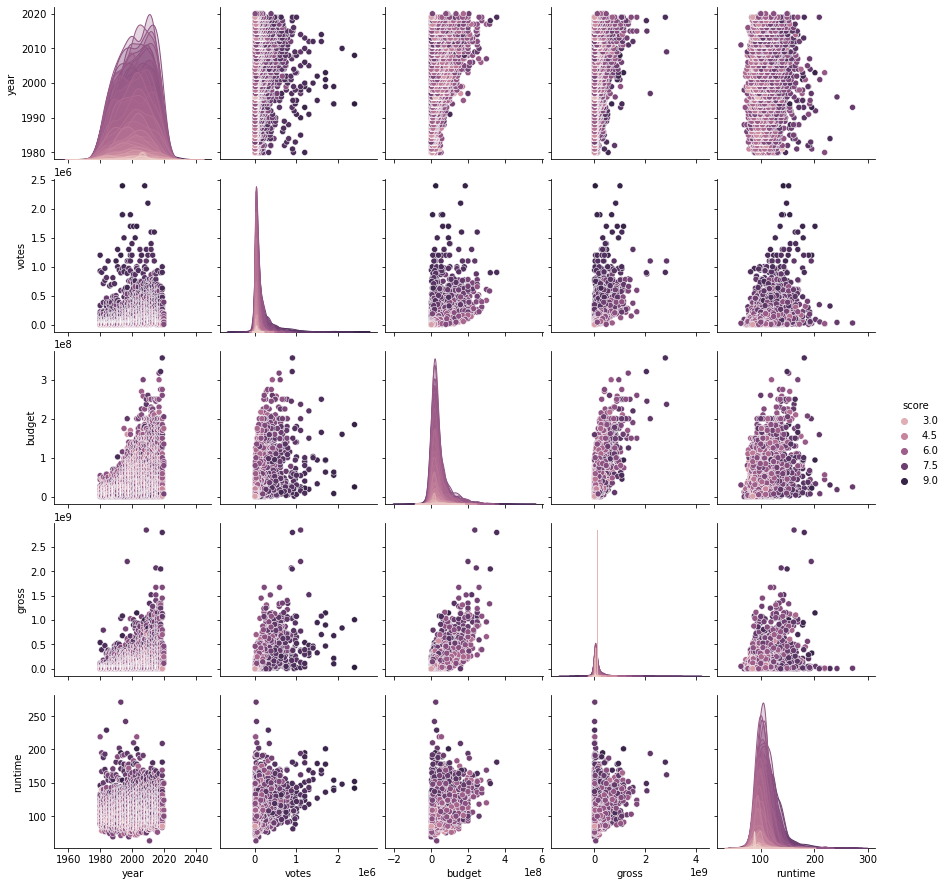

In [39]:
sns.pairplot(movies, hue="score")
plt.show()

#### Normalizasyon

In [40]:
movies_scaled = preprocessing.normalize(movies)
names = ['year','score','votes','budget','gross','runtime']
#movies = pd.DataFrame(movies_scaled,columns=names)
movies

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...
5427,2020,6.6,140000.0,90000000.0,426505244.0,124.0
5428,2020,6.5,102000.0,85000000.0,319715683.0,99.0
5429,2020,5.6,53000.0,175000000.0,245487753.0,101.0
5430,2020,6.8,42000.0,135000000.0,111105497.0,100.0


#### Korelasyon Matrisi

In [41]:
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


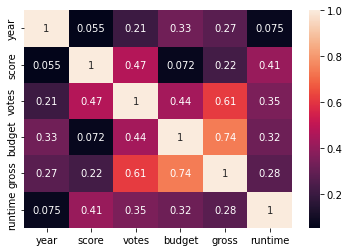

In [42]:
heatmap = sns.heatmap(movies.corr(),annot=True)

### Train and Test Models

In [65]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = movies_oversampled.values.tolist()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)
X = X_scaled_df.values.tolist()

y=[]
for row in X:
    y.append((row[1]))
    del row[1]
X=pd.Series(X).tolist()
y=pd.Series(y).tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

Method for calculate metrics

In [69]:
def calculateMetrics(model):
    #mae
    print('MAE: ',np.mean(np.absolute(scores)))
    
    #mse
    mse = metrics.make_scorer(metrics.mean_squared_error)
    scores = cross_val_score(model, X, y, scoring=mse,cv=10, n_jobs=-1)
    print('MSE: ',np.mean(scores))
    
    #rmse
    rmse = metrics.make_scorer(metrics.mean_squared_error)
    scores = cross_val_score(model, X, y, scoring=rmse,cv=10, n_jobs=-1)
    np.mean(np.sqrt(scores))
    print('RMSE: ',np.mean(np.sqrt(scores)))

##### Lineer Regression

In [70]:
model = LinearRegression()
print('Lineer Regression')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('MSE:')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))

Lineer Regression
MSE:
Test Score:  0.03953007227366411
Train Score:  0.041414547806757934


#### Random Forest

In [71]:
model = RandomForestRegressor(n_estimators = 500)
print('Random Forest')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('MSE:')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))

Random Forest
MSE:
Test Score:  0.002336019905705594
Train Score:  0.0003043820323908909


KNN-5

In [72]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
print('KNN-5')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('MSE:')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))


KNN-5
MSE:
Test Score:  0.007610026279075336
Train Score:  0.003823701407804646


KNN-10

In [78]:
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
print('KNN-10')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('MSE:')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))
predicted = model.predict(X_test)
print('MAE:')
print('Test Score: ',metrics.mean_absolute_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_absolute_error(y_train,predicted))

KNN-10
MSE:
Test Score:  0.009595876987614113
Train Score:  0.0071151049126062646
MAE:
Test Score:  0.0540828960141818
Train Score:  0.04531231309414075


10 different time

In [98]:
lr_mea = []
rf_mea = []
besknn_mea = []
onknn_mea = []
lr_msa = []
rf_msa = []
besknn_msa = []
onknn_msa = []

for i in range(0,10):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = movies_oversampled.values.tolist()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled)
    X = X_scaled_df.values.tolist()

    y=[]
    for row in X:
        y.append((row[1]))
        del row[1]
    X=pd.Series(X).tolist()
    y=pd.Series(y).tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);
    
    #lineer regression
    model = LinearRegression()
    print('Lineer Regression: ',i)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print('MSE:')
    print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
    lr_msa.append(metrics.mean_squared_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_squared_error(y_train,predicted))
    predicted = model.predict(X_test)
    print('MAE:')
    lr_mea.append(metrics.mean_absolute_error(y_test,predicted))
    print('Test Score: ',metrics.mean_absolute_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_absolute_error(y_train,predicted))
    
    #random forest
    model = RandomForestRegressor(n_estimators = 500)
    print('Random Forest: ',i)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print('MSE:')
    print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
    rf_msa.append(metrics.mean_squared_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_squared_error(y_train,predicted))
    predicted = model.predict(X_test)
    print('MAE:')
    rf_mea.append(metrics.mean_absolute_error(y_test,predicted))
    print('Test Score: ',metrics.mean_absolute_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_absolute_error(y_train,predicted))
    
    #knn-5
    from sklearn import neighbors
    model = neighbors.KNeighborsRegressor(n_neighbors = 5)
    print('KNN-5: ',i)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print('MSE:')
    besknn_msa.append(metrics.mean_absolute_error(y_test,predicted))
    print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_squared_error(y_train,predicted))
    predicted = model.predict(X_test)
    print('MAE:')
    besknn_mea.append(metrics.mean_absolute_error(y_test,predicted))
    print('Test Score: ',metrics.mean_absolute_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_absolute_error(y_train,predicted))
    
    #knn-10
    model = neighbors.KNeighborsRegressor(n_neighbors = 10)
    print('KNN-10: ',i)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print('MSE:')
    onknn_msa.append(metrics.mean_absolute_error(y_test,predicted))
    print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_squared_error(y_train,predicted))
    predicted = model.predict(X_test)
    print('MAE:')
    onknn_mea.append(metrics.mean_absolute_error(y_test,predicted))
    print('Test Score: ',metrics.mean_absolute_error(y_test,predicted))
    predicted = model.predict(X_train)
    print('Train Score: ',metrics.mean_absolute_error(y_train,predicted))

Lineer Regression:  0
MSE:
Test Score:  0.04203309852934089
Train Score:  0.04079163985409844
MAE:
Test Score:  0.1704043198609196
Train Score:  0.16776830511733784
Random Forest:  0
MSE:
Test Score:  0.002196816438510336
Train Score:  0.00029314383400125043
MAE:
Test Score:  0.0207763411511468
Train Score:  0.00746597873583131
KNN-5:  0
MSE:
Test Score:  0.007018475205230413
Train Score:  0.003984498687700978
MAE:
Test Score:  0.04259465087158998
Train Score:  0.030074867890540903
KNN-10:  0
MSE:
Test Score:  0.009363659282339024
Train Score:  0.0071059793900305574
MAE:
Test Score:  0.05376985522742941
Train Score:  0.04538971410879769
Lineer Regression:  1
MSE:
Test Score:  0.040957925092841636
Train Score:  0.041054366461422465
MAE:
Test Score:  0.16909757547703844
Train Score:  0.1680664286511825
Random Forest:  1
MSE:
Test Score:  0.0023283421645120903
Train Score:  0.0002865791197165411
MAE:
Test Score:  0.021354010439383512
Train Score:  0.007543193284407492
KNN-5:  1
MSE:
Test 

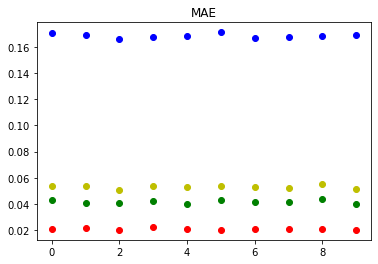

In [101]:
plt.plot(lr_mea,'ob',label='Lineer Regresyon')
plt.plot(rf_mea,'or',label='Random Forest')
plt.plot(besknn_mea,'og',label='5 En Yakın Komsu')
plt.plot(onknn_mea,'oy',label='10 En Yakın Komsu')
plt.title('MAE')
plt.show()

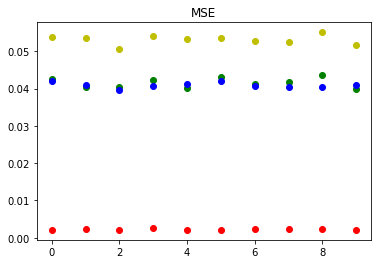

In [103]:
plt.plot(rf_msa,'or',label='Lineer Regresyon')
plt.plot(besknn_msa,'og',label='Random Forest')
plt.plot(onknn_msa,'oy',label='5 En Yakın Komsu')
plt.plot(lr_msa,'ob',label='10 En Yakın Komsu')
plt.title('MSE')
plt.show()

[]